<a href="https://colab.research.google.com/github/maseerab/predictive/blob/main/student_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of dataset:
     GPA  SAT_Score  Extracurricular_Activities Admission_Status
0  3.46       1223                           8         Rejected
1  2.54        974                           8         Rejected
2  2.91        909                           9         Rejected
3  2.83       1369                           5         Accepted
4  3.60       1536                           7         Accepted

Summary:
               GPA    SAT_Score  Extracurricular_Activities
count  250.000000   250.000000                  250.000000
mean     3.238320  1250.432000                    5.204000
std      0.438607   204.733163                    2.964716
min      2.500000   900.000000                    0.000000
25%      2.850000  1080.250000                    3.000000
50%      3.230000  1237.000000                    5.000000
75%      3.590000  1426.000000                    7.750000
max      4.000000  1598.000000                   10.000000

Missing values:
 GPA                           

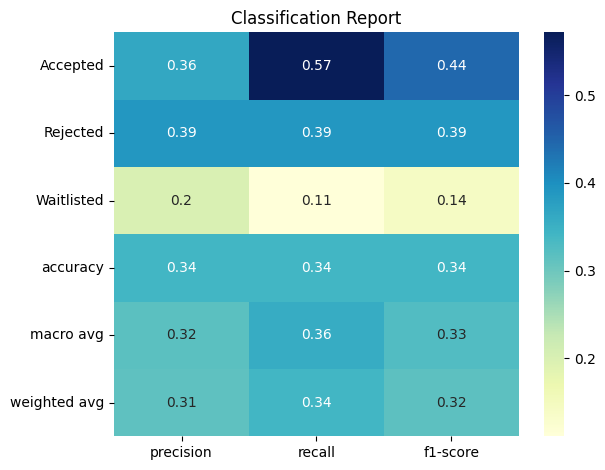

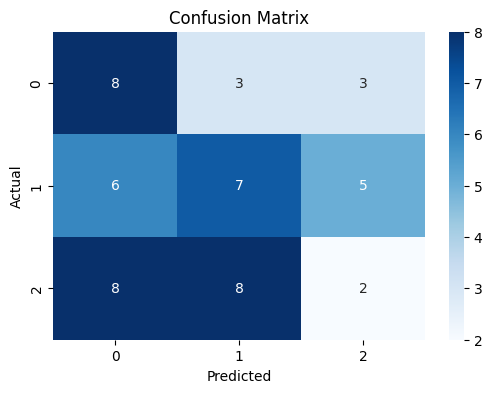

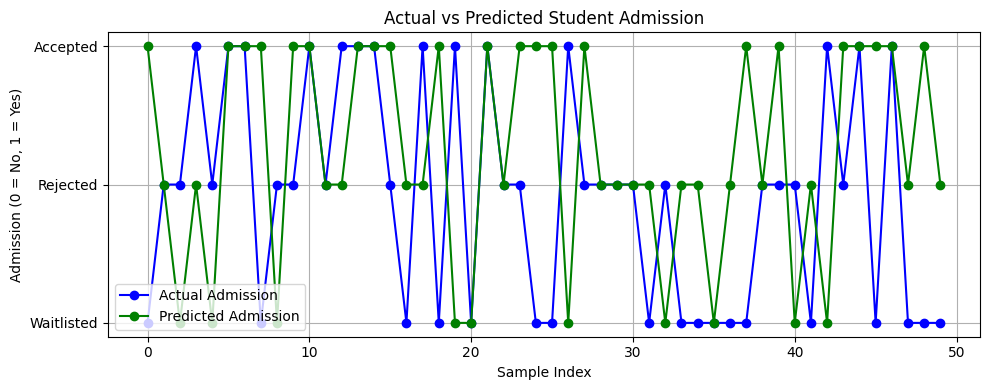

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('student_admission_dataset.csv')
print("First 5 rows of dataset:\n", df.head())
print("\nSummary:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())
X = df.drop(columns=['Admission_Status'])
y = df['Admission_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.tight_layout()
plt.show()
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(range(len(y_test)), y_test.values, 'bo-', label='Actual Admission')
plt.plot(range(len(y_pred)), y_pred, 'go-', label='Predicted Admission')
plt.title("Actual vs Predicted Student Admission")
plt.xlabel("Sample Index")
plt.ylabel("Admission (0 = No, 1 = Yes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
